In [1]:
import sys
sys.path.insert(0, '../src')

from NN import *
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

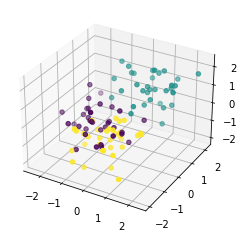

In [2]:
X, y = make_blobs(n_samples=100, n_features=4, centers=((1, 1,1,1), (5, 5,5,5), (3,-1,0,0)), cluster_std = 2)

X = StandardScaler().fit_transform(X)
ax = plt.subplot(projection='3d')
ax.scatter3D( X[:,0], X[:,1], X[:,2], c=y)

N = y.size
# one hot encoding
y_oh = np.zeros((N, 3))
y_oh[np.arange(N), y] = 1

In [3]:
X.shape, y.shape, y_oh.shape, type(X), type(y)

((100, 4), (100,), (100, 3), numpy.ndarray, numpy.ndarray)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y_oh, test_size=0.30)

In [5]:
y_train.shape, X_train.shape

((70, 3), (70, 4))

In [6]:
test_model = NN(4)
test_model.add(3, 'sigmoid')
test_model.add(3, 'softmax')
print(test_model.layer)

2


In [7]:
test_model.hyper(learning_rate=0.01, epochs=1)
test_model.fit(X_train, y_train, visible=True)

top left weight value is  0.01624345363663242
top left weight value is  -0.003224172040135075
epoch 0. Cost is 25.625062275437028
weight matrix 1 is:
[[ 0.0161468  -0.00633355 -0.0055051  -0.01095269]
 [ 0.00870088 -0.02314237  0.01736692 -0.00770107]
 [ 0.0028792  -0.00249875  0.01446633 -0.0207322 ]]
derivative of weight matrix 1 is:
[[ 0.00966528  0.02159834  0.02233797  0.02230042]
 [-0.00467996  0.01269879  0.00811952  0.00889996]
 [ 0.03111925  0.00050431  0.01547453  0.01307933]]
weight matrix 2 is:
[[-0.00077164 -0.00146885  0.01387855]
 [-0.01487195 -0.00544983 -0.0125252 ]
 [ 0.00184264  0.00718201 -0.00980042]]
derivative of weight matrix 2 is:
[[-0.24525321 -0.23716941 -0.25408517]
 [ 0.3873033   0.37255517  0.374662  ]
 [-0.1420501  -0.13538576 -0.12057683]]


In [8]:
x = X_train[:3]
x

array([[-0.21589566, -0.34561193, -0.18052289, -0.78949151],
       [ 0.21621436, -0.45130219,  0.29862615, -1.3307551 ],
       [-0.86929601, -1.02279378, -0.51003509, -1.71196974]])

In [9]:
w1 = test_model.W[1].T
w1

array([[ 0.0161468 ,  0.00870088,  0.0028792 ],
       [-0.00633355, -0.02314237, -0.00249875],
       [-0.0055051 ,  0.01736692,  0.01446633],
       [-0.01095269, -0.00770107, -0.0207322 ]])

In [10]:
b1 = test_model.b[1].T
b1

array([[1.59785054e-05, 1.30597836e-06, 2.45015803e-05]])

In [11]:
z1 = test_model.Z[1].T[:3]
z1

array([[0.00803188, 0.00894589, 0.01379826],
       [0.01897426, 0.02759829, 0.03359689],
       [0.0131994 , 0.02014952, 0.02758887]])

In [12]:
a1 = test_model.A[1].T[:3]
a1

array([[0.50200796, 0.50223646, 0.50344951],
       [0.50474342, 0.50689914, 0.50839843],
       [0.5032998 , 0.50503721, 0.50689678]])

In [13]:
z2 = test_model.Z[2].T[:3]
z2

array([[ 0.00216054, -0.01080711, -0.00240203],
       [ 0.00218992, -0.01088868, -0.00242817],
       [ 0.0021847 , -0.01085641, -0.00242311]])

In [14]:
w2 = test_model.W[2].T
w2

array([[-0.00077164, -0.01487195,  0.00184264],
       [-0.00146885, -0.00544983,  0.00718201],
       [ 0.01387855, -0.0125252 , -0.00980042]])

In [15]:
b2 = test_model.b[2].T
b2

array([[ 0.0051043 , -0.00722752,  0.00212322]])

In [16]:
a2 = test_model.A[2].T[:3]
a2

array([[0.335282  , 0.33096225, 0.33375574],
       [0.33530053, 0.33094382, 0.33375565],
       [0.33529522, 0.33095098, 0.3337538 ]])

In [34]:
for key, value in test_model.dW.items():
    print(key)
    print(value)

2
[[-0.27073796 -0.2742418  -0.27603912]
 [ 0.5367479   0.52559307  0.52875164]
 [-0.26600994 -0.25135127 -0.25271253]]
1
[[-0.01710778  0.00662986  0.0058492   0.01637556]
 [-0.01103039 -0.0005878  -0.00144848  0.00414118]
 [ 0.00208182  0.0207433   0.02242288  0.02644556]]


random weights for starting nb:
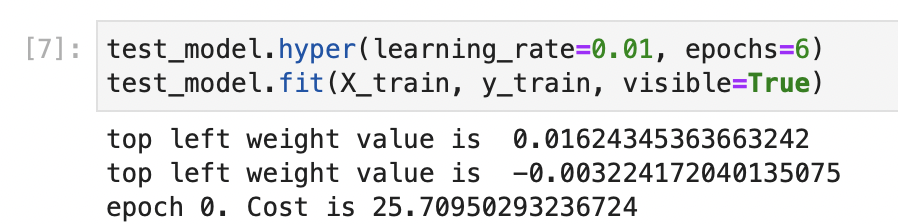

In [35]:
X_train[:5]

array([[-0.2448534 , -0.49830005,  0.42573588, -0.06809145],
       [ 0.2232249 ,  0.01384971, -1.25042979,  1.32944094],
       [-0.59018898,  0.42180397, -0.7482839 , -0.97639631],
       [ 0.85304475, -1.44789792, -0.86083391,  0.29186577],
       [ 0.73339059, -1.36271122,  0.43392496,  0.73609666]])